### Linear Regression with Real Dataset
Predict the prices of houses in California<br>
https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb

#### Load dataset
This is the California housing dataset which contains data from 1990<br>
Description: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [2]:
df_dataset = pd.read_csv('dataset/california_housing_train.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


#### Examine dataset

In [3]:
# Preview
df_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
# Descript data
df_dataset['median_house_value'] /= 1000
df_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

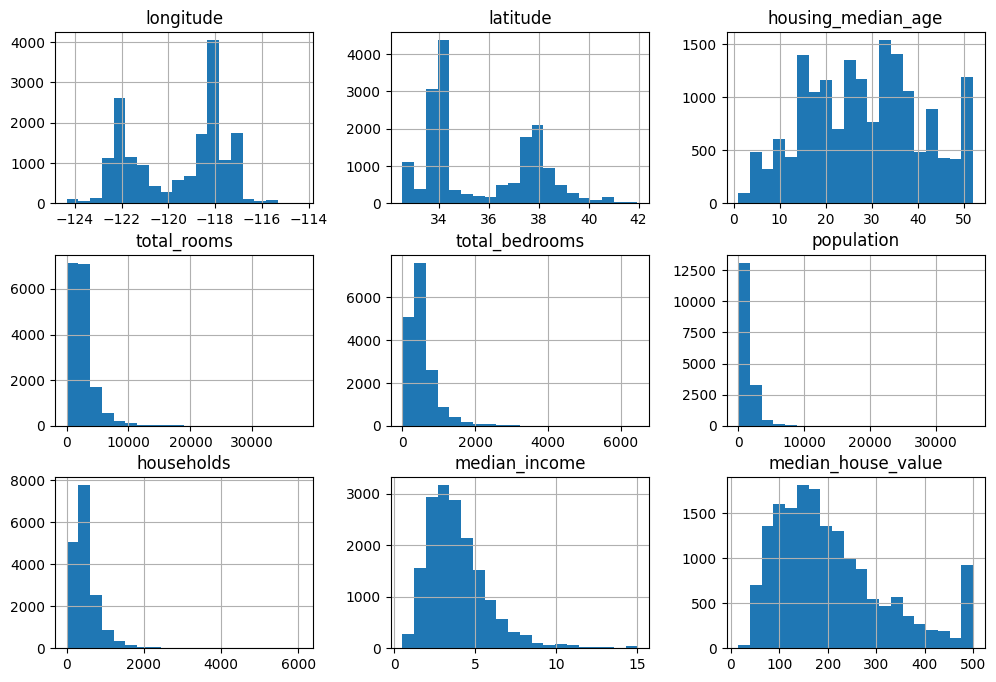

In [5]:
# Examine data distribution
df_dataset.hist(figsize=(12,8), bins=20)

#### Model Training & Building Functions

In [6]:
"""Create and compile a simple linear regression model."""
def build_model(learning_rate: float) -> tf.keras.Model:
    # Most simple tf.keras models are sequential. A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model to code that TensorFlow can efficiently execute. 
    # Configure training to minimize the model's mean squared error. 
    model.compile(
        optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model: tf.keras.Model, feature_column, label_column, epochs, batch_size):
    # Feed the feature values and the label values to the model. The model will train for the number 
    # of epochs, gradually Learning how the feature values RELATE to the label values. 
    history = model.fit(x=df_dataset[feature_column], y=df_dataset[label_column], batch_size=batch_size, epochs=epochs)

    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"] # a pd.Series

    return weight, bias, epochs, rmse

#### Define plotting functions

In [7]:
def plot_model(feature_column: str, label_column: str, weight: float, bias: float):
    plt.figure(figsize=(5,4))
    plt.xlabel(feature_column)
    plt.ylabel(label_column)

    # randomly pick exampls from the dataset
    examples = df_dataset.sample(n=200)

    plt.scatter(examples[feature_column], examples[label_column])

    x0 = 0
    y0 = bias
    x1 = examples[feature_column].max()
    y1 = weight*x1 + bias
    plt.plot([x0, x1], [y0, y1], c='r')

    plt.legend()

def plot_loss_curve(epochs, rmses):
    plt.figure(figsize=(5,4))
    plt.xlabel('epoch')
    plt.ylabel('root mean squared error')
    plt.plot(epochs, rmses, label='loss')
    plt.legend()

#### Start train by selecting an arbitrary Feature

Epoch 1/30
567/567 [==============================] - 0s 369us/step - loss: 831730.3750 - root_mean_squared_error: 911.9926
Epoch 2/30
567/567 [==============================] - 0s 364us/step - loss: 28136.7109 - root_mean_squared_error: 167.7400
Epoch 3/30
567/567 [==============================] - 0s 354us/step - loss: 27261.0391 - root_mean_squared_error: 165.1092
Epoch 4/30
567/567 [==============================] - 0s 343us/step - loss: 26593.8965 - root_mean_squared_error: 163.0764
Epoch 5/30
567/567 [==============================] - 0s 325us/step - loss: 25806.0137 - root_mean_squared_error: 160.6425
Epoch 6/30
567/567 [==============================] - 0s 382us/step - loss: 25245.8066 - root_mean_squared_error: 158.8893
Epoch 7/30
567/567 [==============================] - 0s 368us/step - loss: 24699.2637 - root_mean_squared_error: 157.1600
Epoch 8/30
567/567 [==============================] - 0s 379us/step - loss: 23961.0547 - root_mean_squared_error: 154.7936
Epoch 9/30
567/

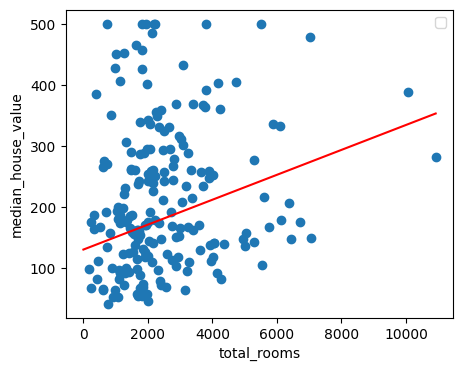

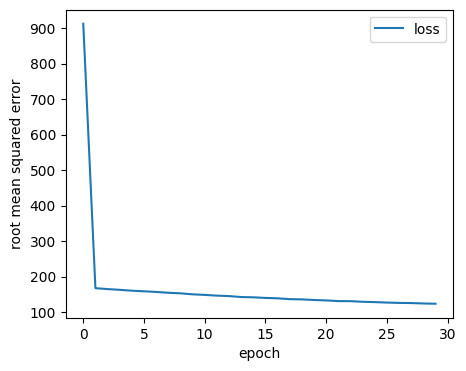

In [8]:
feature_column = 'total_rooms'
label_column = 'median_house_value'

learning_rate = 0.01
epochs = 30
batch_size = 30

model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(model, feature_column, label_column, epochs, batch_size)

plot_model(feature_column, label_column, weight, bias)
plot_loss_curve(epochs, rmses)

#### Use the model to make predictions

In [44]:
jump = 10000
def predict_house_value(n, feature_column, label_column):
    batch = df_dataset[feature_column][jump:jump+n]
    house_values = model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("--------------------------------------")
    for i in range(n):
        print("%5.0f %6.0f %15.0f" % (df_dataset[feature_column][jump+i], 
                                      df_dataset[label_column][jump+i], 
                                      house_values[i][0]))


In [45]:
predict_house_value(2, feature_column, label_column)
# It's very bad prediction

feature   label          predicted
  value   value          value
--------------------------------------
 1960     53             191
 3400     92             234


2023-08-19 14:17:06.509606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [2,1]
	 [[{{node Placeholder/_0}}]]


#### Try another Feature

Epoch 1/18
5667/5667 [==============================] - 2s 328us/step - loss: 46877.1484 - root_mean_squared_error: 216.5113
Epoch 2/18
5667/5667 [==============================] - 2s 331us/step - loss: 19814.0000 - root_mean_squared_error: 140.7622
Epoch 3/18
5667/5667 [==============================] - 2s 333us/step - loss: 18206.3125 - root_mean_squared_error: 134.9308
Epoch 4/18
5667/5667 [==============================] - 2s 327us/step - loss: 18332.4238 - root_mean_squared_error: 135.3973
Epoch 5/18
5667/5667 [==============================] - 2s 343us/step - loss: 18010.5020 - root_mean_squared_error: 134.2032
Epoch 6/18
5667/5667 [==============================] - 2s 341us/step - loss: 18477.4414 - root_mean_squared_error: 135.9317
Epoch 7/18
5667/5667 [==============================] - 2s 343us/step - loss: 18113.3535 - root_mean_squared_error: 134.5859
Epoch 8/18
5667/5667 [==============================] - 2s 336us/step - loss: 17978.0762 - root_mean_squared_error: 134.0824


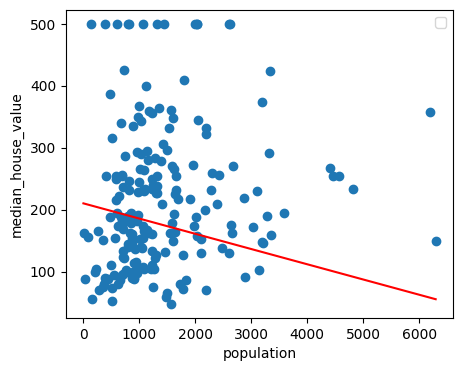

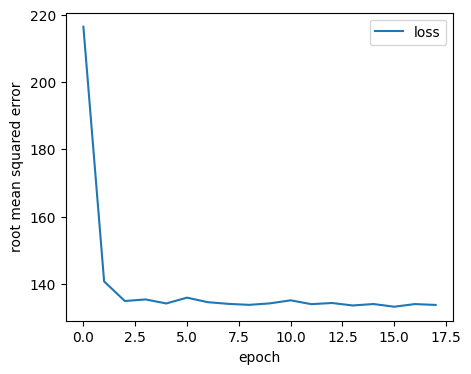

In [9]:
feature_column = 'population'
label_column = 'median_house_value'

learning_rate = 0.05
epochs = 18
batch_size = 3

model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(model, feature_column, label_column, epochs, batch_size)

plot_model(feature_column, label_column, weight, bias)
plot_loss_curve(epochs, rmses)

#### Try to use a Synthetic Feature

In [10]:
# define rooms per person as the synthetic feature
df_dataset['rooms_per_person'] = df_dataset['total_rooms'] / df_dataset['population']
df_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9,5.529064
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1,6.775908
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7,2.162162
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4,2.914563
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5,2.330128


Epoch 1/18
5667/5667 [==============================] - 2s 347us/step - loss: 18595.3242 - root_mean_squared_error: 136.3647
Epoch 2/18
5667/5667 [==============================] - 2s 331us/step - loss: 15715.0449 - root_mean_squared_error: 125.3597
Epoch 3/18
5667/5667 [==============================] - 2s 367us/step - loss: 15734.2295 - root_mean_squared_error: 125.4362
Epoch 4/18
5667/5667 [==============================] - 2s 359us/step - loss: 15841.8184 - root_mean_squared_error: 125.8643
Epoch 5/18
5667/5667 [==============================] - 2s 340us/step - loss: 15882.7402 - root_mean_squared_error: 126.0267
Epoch 6/18
5667/5667 [==============================] - 2s 358us/step - loss: 15817.7275 - root_mean_squared_error: 125.7685
Epoch 7/18
5667/5667 [==============================] - 2s 332us/step - loss: 15892.8301 - root_mean_squared_error: 126.0668
Epoch 8/18
5667/5667 [==============================] - 2s 353us/step - loss: 15835.3691 - root_mean_squared_error: 125.8387


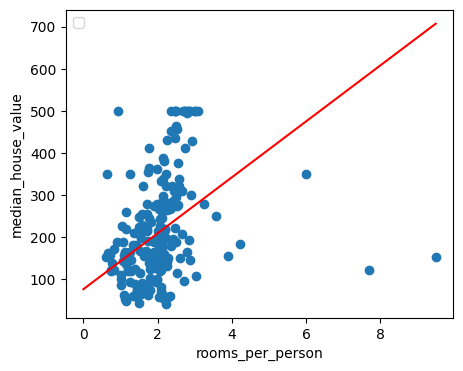

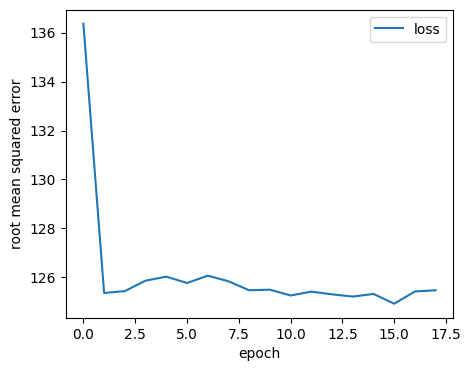

In [11]:
feature_column = 'rooms_per_person'
label_column = 'median_house_value'

learning_rate = 0.05
epochs = 18
batch_size = 3

model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(model, feature_column, label_column, epochs, batch_size)

plot_model(feature_column, label_column, weight, bias)
plot_loss_curve(epochs, rmses)

#### Find Features correlate with the Label => it's very important

Use Correlation Matrix to investigate correlation between Features and Label. Correlation value mearnings:
- 1: perfect postive correlation
- -1: perfect negative correlation
- 0: no correlation

In [50]:
df_dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


<AxesSubplot: >

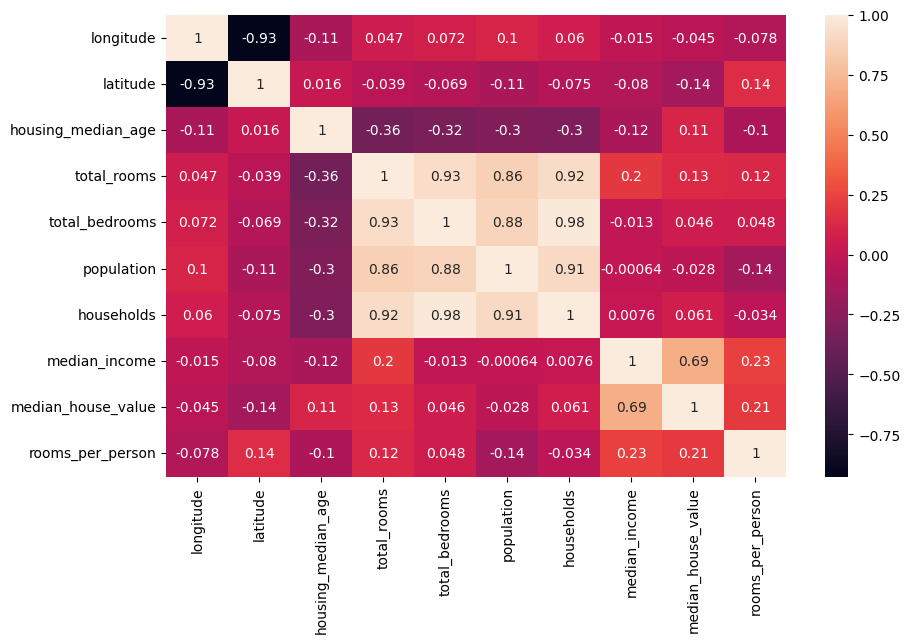

In [58]:
plt.subplots(figsize=(10,6))
sb.heatmap(df_dataset.corr(), annot=True)

#### Use most correlated Feature => best predictive power

Observe that median_income correlates well with Label

Epoch 1/5
1700/1700 [==============================] - 1s 339us/step - loss: 27628.5195 - root_mean_squared_error: 166.2183
Epoch 2/5
1700/1700 [==============================] - 1s 319us/step - loss: 7399.9888 - root_mean_squared_error: 86.0232
Epoch 3/5
1700/1700 [==============================] - 1s 328us/step - loss: 7014.7310 - root_mean_squared_error: 83.7540
Epoch 4/5
1700/1700 [==============================] - 1s 332us/step - loss: 7015.6265 - root_mean_squared_error: 83.7593
Epoch 5/5
1700/1700 [==============================] - 1s 312us/step - loss: 7015.3398 - root_mean_squared_error: 83.7576


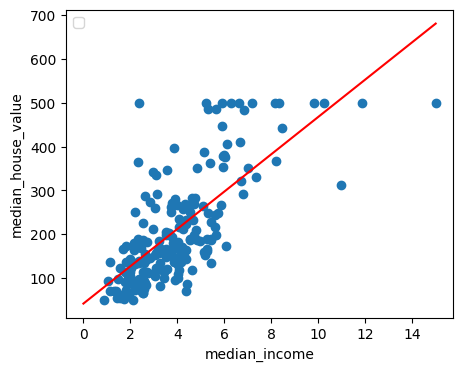

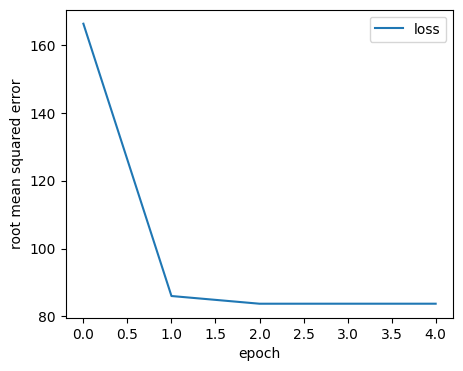

In [12]:
feature_column = 'median_income'
label_column = 'median_house_value'

learning_rate = 0.02
epochs = 5
batch_size = 10

model = build_model(learning_rate)
weight, bias, epochs, rmses = train_model(model, feature_column, label_column, epochs, batch_size)

plot_model(feature_column, label_column, weight, bias)
plot_loss_curve(epochs, rmses)